In [22]:
import pandas as pd
import numpy as np

In [2]:
diamond = pd.read_csv('diamonds.csv')

In [3]:
diamond.drop(columns='Unnamed: 0',inplace=True)

In [4]:
diamond.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
diamond.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [6]:
diamond.shape

(53940, 10)

array([[<Axes: title={'center': 'carat'}>,
        <Axes: title={'center': 'depth'}>,
        <Axes: title={'center': 'table'}>],
       [<Axes: title={'center': 'price'}>, <Axes: title={'center': 'x'}>,
        <Axes: title={'center': 'y'}>],
       [<Axes: title={'center': 'z'}>, <Axes: >, <Axes: >]], dtype=object)

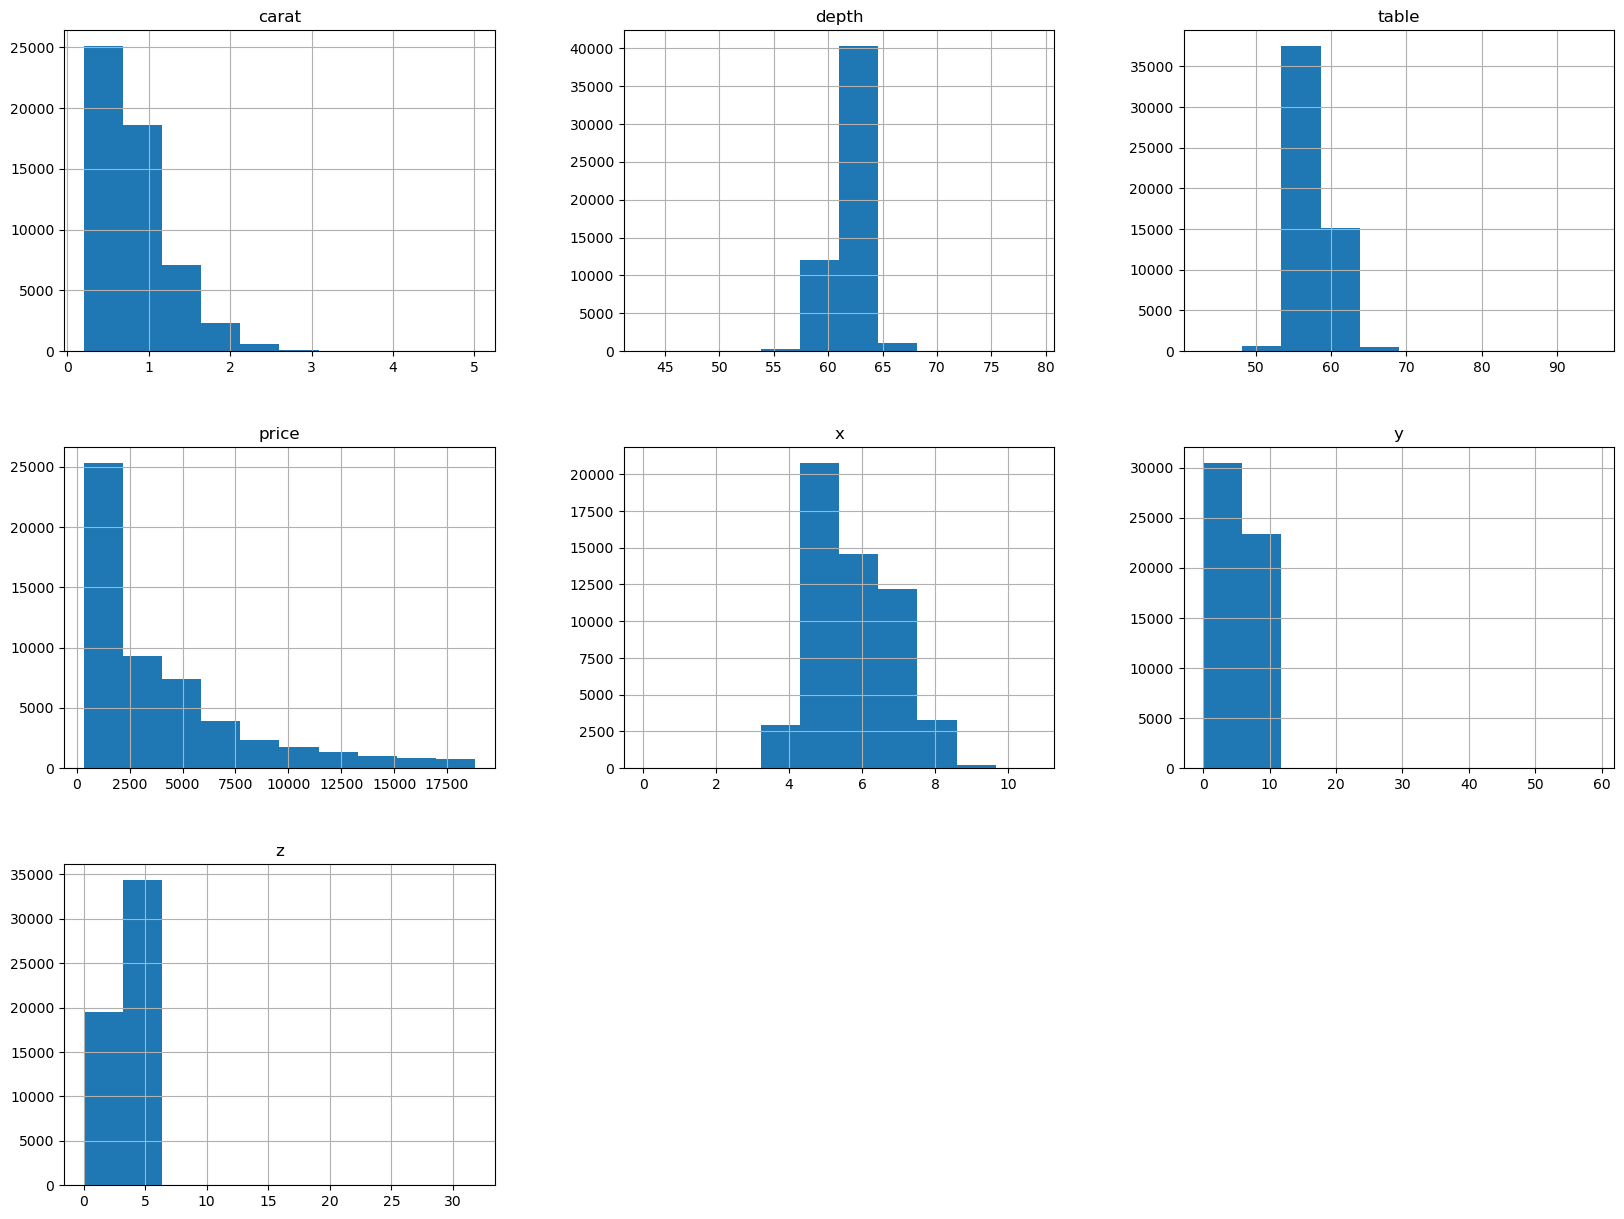

In [7]:
%matplotlib inline
from matplotlib import pyplot as plt
diamond.hist(figsize=(20,15))

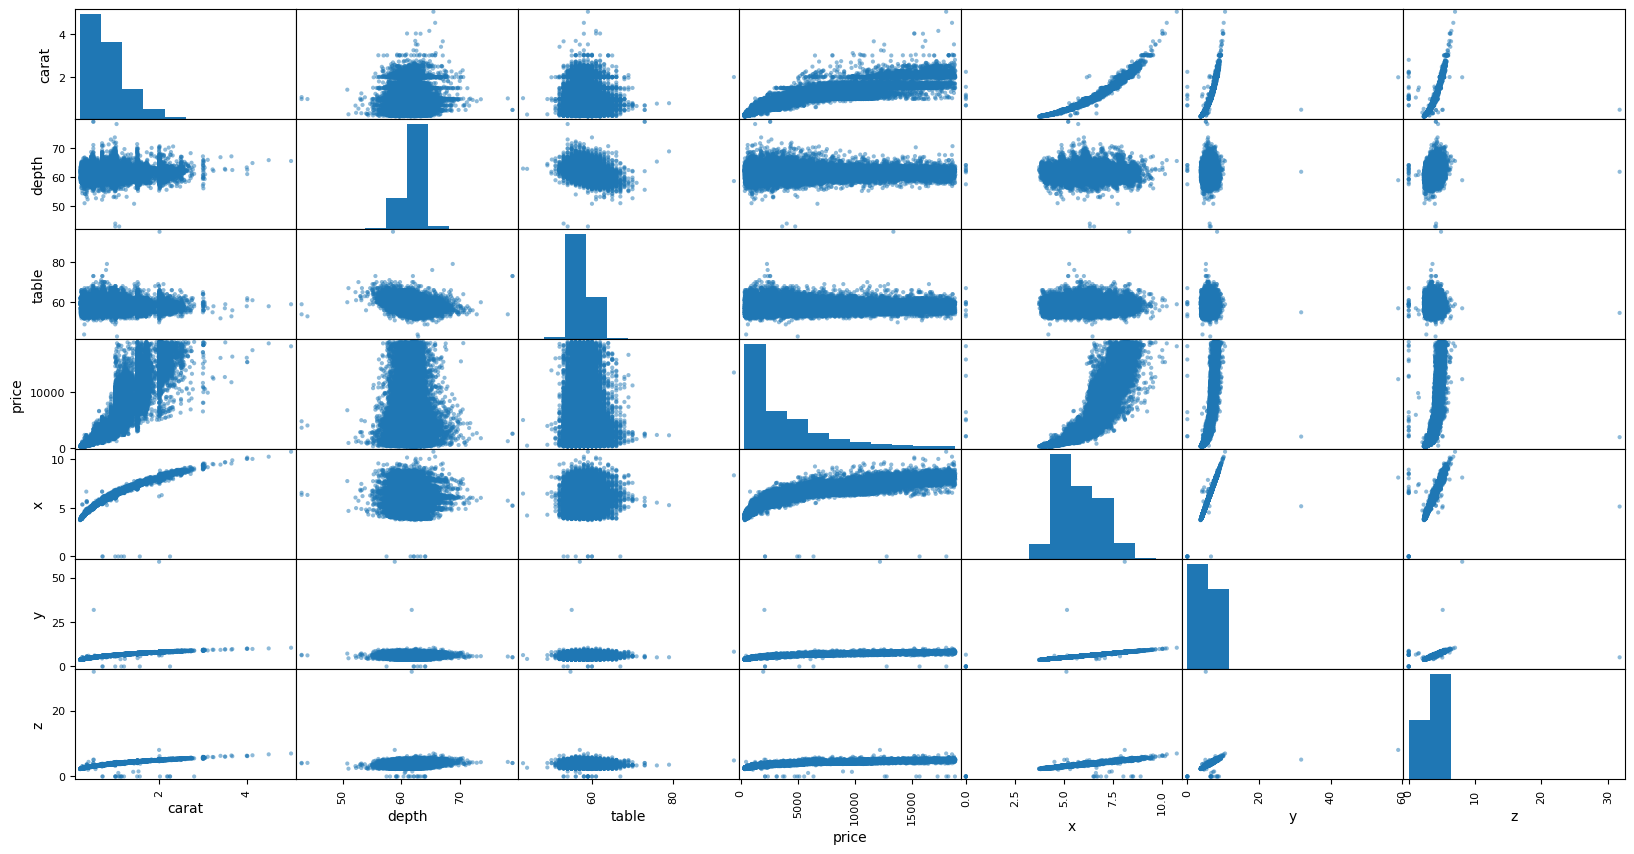

In [9]:
from pandas.plotting import scatter_matrix
scatter_matrix(diamond,figsize=(20,10));

In [10]:
color_mapping = {'J': 0, 'I': 1, 'H': 2, 'G': 3, 'F': 4, 'E': 5, 'D': 6}
diamond.color = diamond.color.map(color_mapping)

In [11]:
# Encoding the ordinal cateogircal variable 'clarity'
clarity_mapping = {'I1': 0, 'SI2': 1, 'SI1': 2, 'VS2': 3, 'VS1': 4, 'VVS2': 5, 'VVS1': 6, 'IF': 7}
diamond.clarity = diamond.clarity.map(clarity_mapping)

In [12]:
# Encode the ordinal categorical variable 'cut'
cut_mapping = {'Fair': 0, 'Good': 1, 'Very Good': 2, 'Premium': 3, 'Ideal': 4}
diamond.cut = diamond.cut.map(cut_mapping)

In [13]:
diamond.describe()

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,2.904097,3.405803,3.051020,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.116600,1.701105,1.647136,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,0.000000,0.000000,0.000000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,2.000000,2.000000,2.000000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,3.000000,3.000000,3.000000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,4.000000,5.000000,4.000000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,4.000000,6.000000,7.000000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [14]:
diamond = diamond.drop(diamond[diamond['x'] == 0].index)
diamond = diamond.drop(diamond[diamond['y'] == 0].index)
diamond = diamond.drop(diamond[diamond['z'] == 0].index)

In [15]:
#Loại bỏ 1% giá trị lớn hơn phân vị 99% 
diamond = diamond[diamond['depth'] < diamond['depth'].quantile(0.99)]
diamond = diamond[diamond['table'] < diamond['table'].quantile(0.99)]
diamond = diamond[diamond['x'] < diamond['x'].quantile(0.99)]
diamond = diamond[diamond['y'] < diamond['y'].quantile(0.99)]
diamond = diamond[diamond['z'] < diamond['z'].quantile(0.99)]

In [16]:
X = diamond.drop(['price'], axis=1)
y = diamond['price']

In [17]:
X_arr = X.to_numpy()
y_arr  = y.to_numpy()

In [18]:
print(X_arr.shape)
print(y_arr.shape)

(51130, 9)
(51130,)


In [19]:
X_train = X_arr[:int(X_arr.shape[0]*0.8)]
y_train = y_arr[:int(X_arr.shape[0]*0.8)]
X_test = X_arr[int(X_arr.shape[0]*0.8):]
y_test = y_arr[int(X_arr.shape[0]*0.8):]

In [20]:
xmean =  X_train.mean(axis= 0)
xstd = X_train.std(axis=0)
X_train = (X_train - xmean)/xstd
X_test = (X_test -  xmean)/xstd

In [23]:
X_train = np.concatenate((np.ones((X_train.shape[0], 1)), X_train), axis=1)
X_test = np.concatenate((np.ones((X_test.shape[0], 1)), X_test), axis=1)

In [24]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape )

(40904, 10) (40904,) (10226, 10) (10226,)


In [25]:
N = X_train.shape[0]
n_epochs = 1000
m = 1000
learning_rate = 0.001

# khởi tạo giá trị tham số
theta = np.random.randn(10, 1)
losses = []

for epoch in range(n_epochs):
    for i in range(0, N, m):
        # lấy 1 sample            
        x = X_train[i:i+m, :]       
        y = y_train[i:i+m]
        y = y[:, np.newaxis]

        # predict y_hat
        y_hat = x.dot(theta)
                
        # compute loss
        loss = np.multiply((y_hat-y), (y_hat-y))
        losses.append(np.mean(loss))
        
        # compute gradient
        k = 2*(y_hat-y)
        gradients = x.T.dot(k)

        # update weights
        theta = theta - learning_rate*(gradients/m)

    print(f"Epoch {epoch+1}/{n_epochs} - Loss: {losses[-1]}")

Epoch 1/1000 - Loss: 2391304.532375502
Epoch 2/1000 - Loss: 2787367.871187564
Epoch 3/1000 - Loss: 2915611.2681060964
Epoch 4/1000 - Loss: 2844238.8164380034
Epoch 5/1000 - Loss: 2647844.118757931
Epoch 6/1000 - Loss: 2386807.015324264
Epoch 7/1000 - Loss: 2103737.8721834454
Epoch 8/1000 - Loss: 1825924.059607527
Epoch 9/1000 - Loss: 1569189.1134162412
Epoch 10/1000 - Loss: 1341456.81204766
Epoch 11/1000 - Loss: 1145536.807382516
Epoch 12/1000 - Loss: 981124.5185660679
Epoch 13/1000 - Loss: 846160.0519691384
Epoch 14/1000 - Loss: 737712.464256885
Epoch 15/1000 - Loss: 652531.884883526
Epoch 16/1000 - Loss: 587378.1460738785
Epoch 17/1000 - Loss: 539203.679255053
Epoch 18/1000 - Loss: 505244.13786591275
Epoch 19/1000 - Loss: 483052.45168946474
Epoch 20/1000 - Loss: 470499.6050609825
Epoch 21/1000 - Loss: 465757.0069759284
Epoch 22/1000 - Loss: 467269.7281496242
Epoch 23/1000 - Loss: 473726.2332406788
Epoch 24/1000 - Loss: 484027.8974621842
Epoch 25/1000 - Loss: 497260.12184947677
Epoch 

In [26]:
# Đánh giá trên tập test
test_predictions = X_test.dot(theta)
li = np.mean((test_predictions - y_test)*(test_predictions - y_test))
print(f"MSE: {li}")

MSE: 1537520.7799166443


In [27]:
li = np.mean(np.abs(test_predictions - y_test))
print(f"MAE: {li}")

MAE: 955.1256771384576


In [28]:
np.savez('weight.npz', x_mean = xmean, x_std =xstd, theta =theta)

In [29]:
np.savez('data.npz', X_train = X_train, y_train =y_train, X_test = X_test, y_test = y_test)